# Import Statements

In [2]:
%run "C:\Users\zahid\PycharmProjects\AutoTrader\Prototype Python Connector\dwx_tick_data_io".py
%load_ext autoreload
%autoreload
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Historical Data Retrieval

In [3]:
htdExtractor = DWX_TICK_DATA_IO(
    _path=r'C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original')

output = htdExtractor._get_symbol_as_dataframe_(
    _symbol='GBPUSD', _precision='tick', _date='2019-06-04')

[INFO] Finding symbol files.. please wait..
[INFO] Processing BID (10) / ASK (10) files.. please wait..
BIDS: 10 / 10 - C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original/GBPUSD/GBPUSD_BID_2019-06-04_09.log.gz10
<class 'pandas.core.frame.DataFrame'>

ASKS: 10 / 10 - C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original/GBPUSD/GBPUSD_ASK_2019-06-04_09.log.gz

In [10]:
output.rename(columns={'ask_price':'Ask','bid_price':'Bid'},inplace=True)
output.index.rename('Time',inplace=True)
output.index = output.index.floor('S') # Truncate precision to seconds (MT4 does not provide millisecond precision)
output

,Ask,Bid
Time,,
2019-06-04 00:00:00,1.26635,1.26628
2019-06-04 00:00:00,1.26634,1.26627
2019-06-04 00:00:00,1.26634,1.26628
2019-06-04 00:00:00,1.26634,1.26627
2019-06-04 00:00:00,1.26634,1.26628
2019-06-04 00:00:00,1.26634,1.26627
2019-06-04 00:00:00,1.26636,1.26627
2019-06-04 00:00:00,1.26635,1.26627
2019-06-04 00:00:00,1.26635,1.26628


# Comparing the historical with MT4

In [6]:
# Comparison set
historicalSet = output

# MT4 Set
MT4Set = pd.read_hdf('testTickData.h5')
MT4Set = MT4Set.loc[:,'Bid':'Ask']

<IPython.core.display.Javascript object>


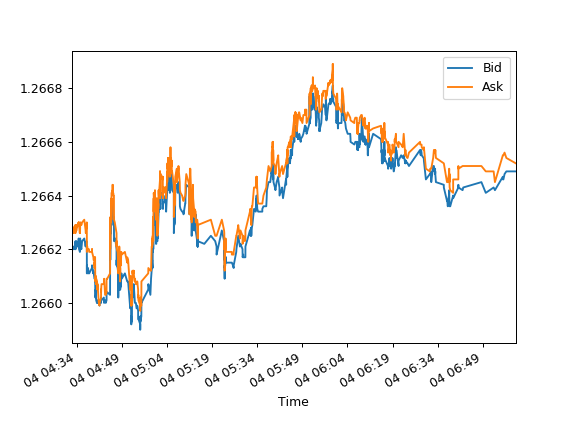

(1166, 2)


<IPython.core.display.Javascript object>


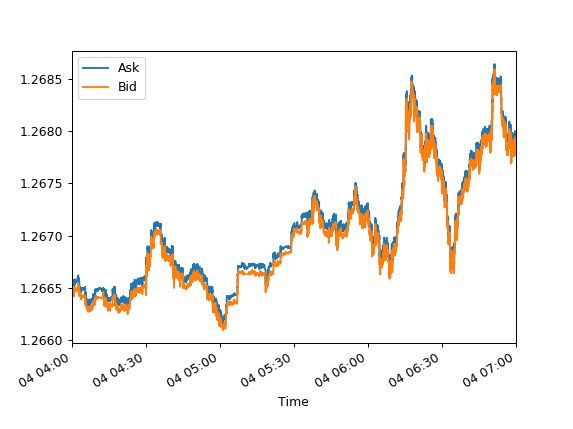

(28906, 2)


In [17]:
MT4Set['2019-06-04 04:00:00':'2019-06-04 07:00:00'].plot()
print(MT4Set['2019-06-04 04:00:00':'2019-06-04 07:00:00'].shape)
historicalSet['2019-06-04 04:00:00':'2019-06-04 07:00:00'].plot()
print(historicalSet['2019-06-04 04:00:00':'2019-06-04 07:00:00'].shape)